In [1]:
from intake import cat
from datatree import DataTree, map_over_subtree

from dask.distributed import Client

import xarray as xr
import numpy as np
from datetime import timedelta
import cf_xarray as cfxr
import xesmf

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.lines as mlines

In [2]:
import numpy as np
import scipy as sc
import xarray as xr
import matplotlib.pyplot as plt
from eofs.standard import Eof
import cartopy.crs as ccrs
import cartopy.crs as ccrs
import cartopy
import matplotlib as mpl
import scipy as sc
import cartopy.feature
import matplotlib.path as mpath
from cartopy import feature
import cmocean as cm
from cartopy.util import add_cyclic_point as cycpt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from sklearn.preprocessing import normalize
import datetime
import os

## Get bathy for plots (from model)

In [4]:
names = ['Neutral', 'PC1Plus', 'PC1Minus', 'PC2Plus', 'PC2Minus']
import cosima_cookbook as cc 
expt = '01deg_jra55v140_iaf_cycle3'
session = cc.database.create_session()
hu = cc.querying.getvar(expt, 'hu', session, n=1) 
hu = hu.sel(yu_ocean = slice(-90,-50))
area = cc.querying.getvar(expt, variable='area_u', 
                          session= session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1)
area = area.sel(yu_ocean = slice(-90,-50))

In [4]:
area = cc.querying.getvar(expt=expts[0], variable='area_u', 
                          session=sessions[0], frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1)
area = area.sel(yu_ocean = slice(-90,-50))

In [5]:
hu = cc.querying.getvar(expt=expts[0], variable='hu', 
                          session=sessions[0], frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1)
hu = hu.sel(yu_ocean = slice(-90,-50))



In [5]:
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=18) 
rc('ytick', labelsize=18) 
rc('axes', labelsize=18) 

In [20]:
frazil = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/frazil.nc")
congel = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/congel.nc")
aice = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/aice.nc")
da_uvel_coarsen = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/uvel_coarsen.nc")
da_vvel_coarsen = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/vvel_coarsen.nc")

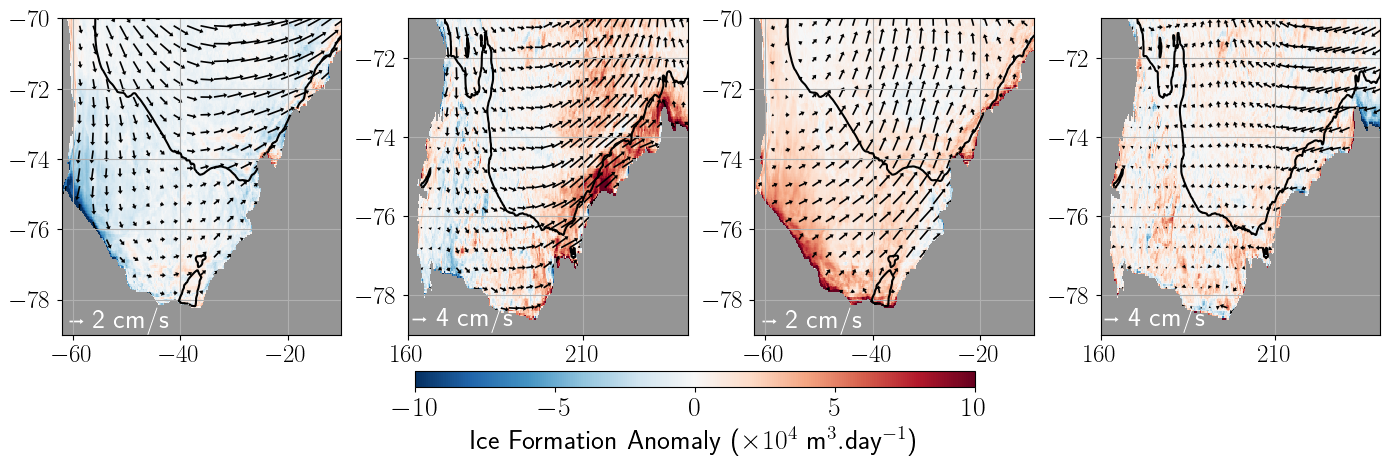

In [24]:
f = plt.figure(figsize = (14,4))
ax3 = plt.subplot2grid((2, 4), (0, 0), rowspan=2)
ax4 = plt.subplot2grid((2, 4), (0, 1), rowspan=2)
ax5 = plt.subplot2grid((2, 4), (0, 2), rowspan=2)
ax6 = plt.subplot2grid((2, 4), (0, 3), rowspan=2)
Q = []


desired_length = 0.01  # plot units
actual_speed = desired_length * 150  # = 15 m/s
ax.set_ylim(-80, -52)


ax = ax4
ice_diff_1 = ((frazil.sel(scenario=names[1])[0:12].mean('time') - 
               frazil.sel(scenario=names[0])[0:12].mean('time') + 
               congel.sel(scenario=names[1])[0:12].mean('time') - 
               congel.sel(scenario=names[0])[0:12].mean('time')) / 100 * area * 1e-4)
cs = ice_diff_1.plot(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r', add_colorbar=False)
u_diff_1 = (da_uvel_coarsen.sel(scenario=names[1]).mean("time") - 
            da_uvel_coarsen.sel(scenario=names[0]).mean("time"))
v_diff_1 = (da_vvel_coarsen.sel(scenario=names[1]).mean("time") - 
            da_vvel_coarsen.sel(scenario=names[0]).mean("time"))
Q = ax.quiver(da_vvel_coarsen.sel(scenario=names[0]).xu_ocean, 
              da_vvel_coarsen.sel(scenario=names[0]).yu_ocean,
              u_diff_1, v_diff_1,
              scale=0.8, width=0.006, headwidth=3, headlength=2, headaxislength=2)
land = xr.where(np.isnan(hu.rename('land')), 1, np.nan)
land.plot(ax=ax, add_colorbar=False, cmap="Greys")
hu.plot.contour(ax=ax, levels=[1000], colors='k')
ax.set_xlim(-200, -120)
new_labels = [r"$%s$"%int(t+360) for t in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_ylim(-79, -71)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()
desired_length = 0.05
actual_speed = desired_length * 0.8
qk = ax.quiverkey(Q, X=-195, Y=-78.6, U=actual_speed, 
                  label="%s cm/s" % int(actual_speed*100),
                  labelpos='E', fontproperties={"size": 20, "weight": "bold"}, 
                  coordinates="data", color="white", labelcolor="white")

ax = ax6
ice_diff_3 = ((frazil.sel(scenario=names[3])[0:12].mean('time') - 
               frazil.sel(scenario=names[0])[0:12].mean('time') + 
               congel.sel(scenario=names[3])[0:12].mean('time') - 
               congel.sel(scenario=names[0])[0:12].mean('time')) / 100 * area * 1e-4)
cs = ice_diff_3.plot(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r', add_colorbar=False)
u_diff_3 = (da_uvel_coarsen.sel(scenario=names[3]).mean("time") - 
            da_uvel_coarsen.sel(scenario=names[0]).mean("time"))
v_diff_3 = (da_vvel_coarsen.sel(scenario=names[3]).mean("time") - 
            da_vvel_coarsen.sel(scenario=names[0]).mean("time"))
Q = ax.quiver(da_vvel_coarsen.sel(scenario=names[0]).xu_ocean, 
              da_vvel_coarsen.sel(scenario=names[0]).yu_ocean,
              u_diff_3, v_diff_3,
              scale=0.8, width=0.006, headwidth=3, headlength=2, headaxislength=2)
land.plot(ax=ax, add_colorbar=False, cmap="Greys")
hu.plot.contour(ax=ax, levels=[1000], colors='k')
ax.set_xlim(-200, -120)
new_labels = [r"$%s$"%int(t+360) for t in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_ylim(-79, -71)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()
qk = ax.quiverkey(Q, X=-195, Y=-78.6, U=actual_speed, 
                  label="%s cm/s" % int(actual_speed*100),
                  labelpos='E', fontproperties={"size": 20, "weight": "bold"}, 
                  coordinates="data", color="white", labelcolor="white")


ax = ax3
cs = ice_diff_1.plot(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r', add_colorbar=False)
Q = ax.quiver(da_vvel_coarsen.sel(scenario=names[0]).xu_ocean, 
              da_vvel_coarsen.sel(scenario=names[0]).yu_ocean,
              u_diff_1, v_diff_1,
              scale=0.4, width=0.006, headwidth=3, headlength=2, headaxislength=2)
land.plot(ax=ax, add_colorbar=False, cmap="Greys")
hu.plot.contour(ax=ax, levels=[1000], colors='k')
ax.set_xlim(-62, -10)
ax.set_ylim(-79, -70)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()
actual_speed_ross = desired_length * 0.4
qk = ax.quiverkey(Q, X=-58, Y=-78.6, U=actual_speed_ross,
                  label="%s cm/s" % int(actual_speed_ross*100), 
                  labelpos='E', labelcolor="white",
                  fontproperties={"size": 20, "weight": "bold"}, 
                  coordinates="data", color="white")

ax = ax5
cs = ice_diff_3.plot(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r', add_colorbar=False)
Q = ax.quiver(da_vvel_coarsen.sel(scenario=names[0]).xu_ocean, 
              da_vvel_coarsen.sel(scenario=names[0]).yu_ocean,
              u_diff_3, v_diff_3,
              scale=0.4, width=0.006, headwidth=3, headlength=2, headaxislength=2)
land.plot(ax=ax, add_colorbar=False, cmap="Greys")
hu.plot.contour(ax=ax, levels=[1000], colors='k')
ax.set_xlim(-62, -10)
ax.set_ylim(-79, -70)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()
qk = ax.quiverkey(Q, X=-58, Y=-78.6, U=actual_speed_ross,
                  label="%s cm/s" % int(actual_speed_ross*100), 
                  labelpos='E', labelcolor="white",
                  fontproperties={"size": 20, "weight": "bold"}, 
                  coordinates="data", color="white")


plt.tight_layout()
f.subplots_adjust(bottom=0.15)
cbar_ax = f.add_axes([0.3, 0.02, 0.4, 0.04])
cbar = f.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'Ice Formation Anomaly ($\times 10^4$ m$^{3}.$day$^{-1}$)', 
               fontsize=20, fontweight='bold')
cbar.ax.tick_params(labelsize=20)
plt.show()

In [21]:
dsw_response = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig2/dswf_year1_response.nc")
dsw_benchmark = xr.open_dataset("/g/data/oz91/ma3822/ZW3/data/fig2/dswf_benchmark.nc")

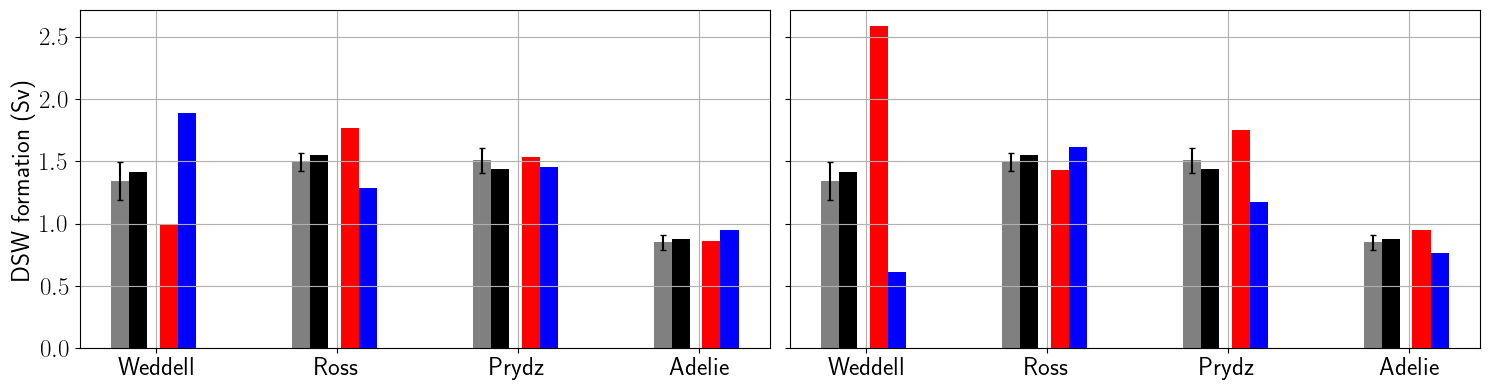

In [22]:
regions = dsw_response.region.to_numpy()

fig, axes = plt.subplots(1,2,figsize=(15,4), sharey = True)
width= 0.10  # the width of the bars

ax = axes[0]
rects1 = ax.bar(np.arange(len(regions)) - 0.20, dsw_benchmark["mean"], width,color=['grey'], label = "Other years", yerr = 2*np.array(dsw_benchmark["std"]),capsize = 2)

for i in range(len(regions)):
    
    x = np.array([i-0.35, i-3*width/2-0.03, i-width/2-0.03])+0.25  # the label locations
    if i ==0:
        rects1 = ax.bar(x, dsw_response.sel(region = regions[i])[:3], width,color=['k','r', 'b'],label=['CONTROL', "PCPlus", "PCMinus"] )
    else:
        rects1 = ax.bar(x, dsw_response.sel(region = regions[i])[:3], width,color=['k','r', 'b'])
ax.grid()
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions)
ax.set_ylabel("DSW formation (Sv)")

ax = axes[1]
rects1 = ax.bar(np.arange(len(regions)) - 0.20, dsw_benchmark["mean"], width,color=['grey'], label = "Other years", yerr = 2*np.array(dsw_benchmark["std"]),capsize = 2)

for i in range(len(regions)):
    
    x = np.array([i-0.35, i-3*width/2-0.03, i-width/2-0.03])+0.25  # the label locations
    if i ==0:
        rects1 = ax.bar(x, [dsw_response.sel(region = regions[i])[0],dsw_response.sel(region = regions[i])[3],dsw_response.sel(region = regions[i])[4]], width,color=['k','r', 'b'])
    else:
        rects1 = ax.bar(x,[dsw_response.sel(region = regions[i])[0],dsw_response.sel(region = regions[i])[3],dsw_response.sel(region = regions[i])[4]], width,color=['k','r', 'b'])
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions)
# ax.legend(fontsize=15,loc=1)
plt.tight_layout()
ax.grid()